# NN (L) Global Sustainable Equity time series forecasting using ARIMA models

## Start timing the ETL and forecast

In [1]:
import timeit
start_time = timeit.default_timer()

## Import all the necessary libraries

In [2]:
# ## Import all the necessary libraries
import time
import os
import datetime as dt
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

## Import, clean and visualise the historical data

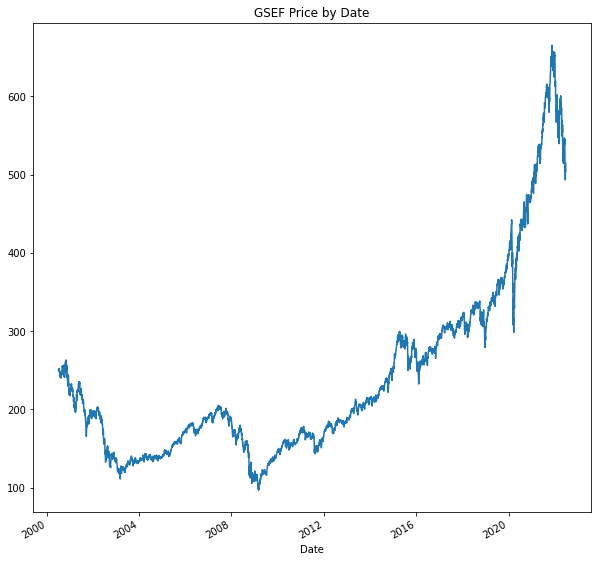

In [7]:
pd.set_option('display.max_column',None)
tomorrow = (dt.date.today() + dt.timedelta(days=1)).isoformat() #get tomorrow in iso format as needed'''
url = pd.read_html("https://markets.ft.com/data/funds/tearsheet/historical?s=LU0119216553:EUR", header=0)
table = url[0]
gsef_latest = table[['Date', 'Close']]
gsef_latest_selected= gsef_latest.copy()

gsef_latest_selected['Date'] = gsef_latest_selected.loc[:,'Date'].str[-12:]
gsef_latest_selected['Date'] = pd.to_datetime(gsef_latest_selected['Date'], dayfirst=True)

gsef_historical= pd.read_csv('gsef_output/historical_gsef.csv', parse_dates=['Date'], dayfirst=True)

gsef = pd.concat([gsef_latest_selected, gsef_historical], ignore_index=True).sort_values(by="Date")

gsef = gsef.reset_index(drop=True)

gsef['pct_change']= (gsef["Close"].pct_change()*100).round(2)

gsef = gsef.drop_duplicates('Date')

gsef.to_csv('gsef_output/historical_gsef.csv', index=False)

# Drop extra columns
gsef = gsef.drop('pct_change', axis=1)

gsef.plot(x= 'Date', y='Close', figsize=(10,10), title= 'GSEF Price by Date', legend=False)

historical_chart= 'gsef_output/gsef_historical.png'

# Check if the historical data's chart exists and save its latest version
if os.path.exists(historical_chart):
  os.remove(historical_chart)
else:
  print("The historical chart didn't exist and it has been created.")

plt.savefig('gsef_output/gsef_historical.png')

plt.show()

In [8]:
# Brief Description of our dataset
gsef.describe()

,Close
count,5546.000000
mean,239.293568
std,117.761173
min,96.810000
25%,157.460000
50%,195.580000
75%,291.997500
max,665.450000


In [9]:
gsef.info() # Check whether the date is as object type or date type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5546 entries, 0 to 5564
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5546 non-null   datetime64[ns]
 1   Close   5546 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 130.0 KB


In [10]:
gsef.head()

,Date,Close
0,2000-07-07,250.00
1,2000-07-10,250.00
2,2000-07-11,250.00
3,2000-07-12,249.61
4,2000-07-13,249.80


In [11]:
# Set index as "Date" column
gsef = gsef.set_index('Date')

In [12]:
gsef

,Close
Date,
2000-07-07,250.00
2000-07-10,250.00
2000-07-11,250.00
2000-07-12,249.61
2000-07-13,249.80
...,...
2022-06-16,493.33
2022-06-17,497.29
2022-06-21,505.60


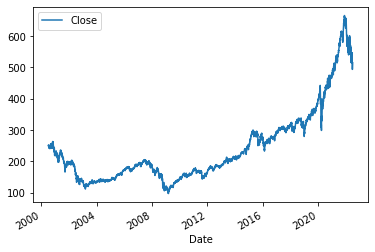

In [15]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
gsef.plot(ax=ax1)
plt.show()

In [18]:
# Train data - all data up till end of 2021.
gsef_train = gsef.loc[:'2021']

# Test data - all data from 2022 onwards
gsef_test = gsef.loc['2022':]

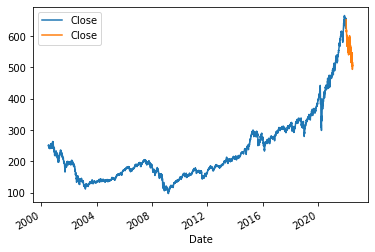

In [19]:
# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
gsef_train.plot(ax=ax)
gsef_test.plot(ax=ax)
plt.show()

## Calculate the analysis' and forecast's timing

In [7]:
# Calculate and print the time elapsed to run ETL process and the date and time of the latest run
time_elapsed = timeit.default_timer() - start_time

time_elapsed_minutes = int((time_elapsed % 3600) // 60)

time_elapsed_seconds = int(time_elapsed % 60)

now = dt.datetime.now()

print("\n Success! Your GSEF forecast using ARIMA models has been updated in {} minutes and {} seconds on {}".format(time_elapsed_minutes, time_elapsed_seconds, now.strftime("%Y-%m-%d %H:%M:%S")))


 Success! Your GSEF forecast using ARIMA models has been updated in 0 minutes and 4 seconds on 2022-06-24 20:26:35
